In [320]:
import pickle
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   

import matplotlib.pylab as plt
%matplotlib inline

In [321]:
#Import all train data those are concated together and the Labels.
df = pd.read_csv("D:/Project/Sample data/Sam_8/train_numeric_sample.csv", index_col=0,)
columns = df.drop(["Response"], axis=1).columns

In [322]:
def getSample(frac):
    data = df.sample(frac=frac)
    return data

In [323]:
df_percent.shape

(800, 969)

In [328]:
def modelfit(alg, X_all, y_all,i, useTrainCV=True, cv_folds=3, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_all, label=y_all)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=1)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_all, y_all, eval_metric=['auc'])
    
    print(alg)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_all)
    dtrain_predprob = alg.predict_proba(X_all)[:,1]
    
    sorted_idx = np.argsort(alg.feature_importances_)[::-1]
    f_name = []
    score = []
    print('Important Features:')
    for index in sorted_idx:
        #print([columns[index], alg.feature_importances_[index]])
        f_name.append(columns[index])
        score.append(alg.feature_importances_[index])
    im_Feature= pd.DataFrame(f_name, columns =["f_name"])
    im_Feature["score"] = score
    im_Feature=im_Feature.head(49)
    out_file = "D:/input output csv" + "/data_{}.csv".format(i+1)

    im_Feature.to_csv(out_file)
    print(im_Feature.head())
    #Print model report:
    print("\nModel Report")
    #print "Accuracy : %.4g" % metrics.accuracy_score(y_all, X_all)
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_all, dtrain_predprob))

   # print(alg.booster())   
    out_file = "D:/input output csv" + "/data_{}.png".format(i+1)

   # print(alg.booster())                
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)[:25]
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    
    plt.savefig(out_file)
    print(feat_imp.to_string())

In [330]:
def modelfit(alg, X_all, y_all, i, useTrainCV=True, cv_folds=3, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_all, label=y_all)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=1)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_all, y_all, eval_metric=['auc'])
    
    print(alg)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_all)
    dtrain_predprob = alg.predict_proba(X_all)[:,1]
        
    #Print model report:
    print("\nModel Report")
    #print "Accuracy : %.4g" % metrics.accuracy_score(y_all, X_all)
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_all, dtrain_predprob))

   # print(alg.booster())                
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)[:25]
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    
    plt.savefig('D:/Project_data_all_L3S/Process_data/Train_num.png')
    print(feat_imp.to_string())

C:\Users\Rezaul Abedin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Rezaul Abedin\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	train-auc:0.844799+0.014207	test-auc:0.584696+0.074948
[1]	train-auc:0.927045+0.0186769	test-auc:0.55647+0.0648361
[2]	train-auc:0.953806+0.0129034	test-auc:0.547382+0.0315946
[3]	train-auc:0.973204+0.00458539	test-auc:0.525055+0.0329166
[4]	train-auc:0.984533+0.00387535	test-auc:0.561835+0.0339649
[5]	train-auc:0.988957+0.00233949	test-auc:0.564399+0.0330031
[6]	train-auc:0.993824+0.00182968	test-auc:0.597815+0.0587061
[7]	train-auc:0.995779+0.000524596	test-auc:0.616312+0.0717208
[8]	train-auc:0.996795+0.000790489	test-auc:0.630211+0.0707058
[9]	train-auc:0.997807+1.25698e-05	test-auc:0.632295+0.060902
[10]	train-auc:0.998133+0.000527179	test-auc:0.633222+0.0628026
[11]	train-auc:0.998941+0.000302157	test-auc:0.632024+0.0551647
[12]	train-auc:0.999295+0.000298947	test-auc:0.636487+0.0458184
[13]	train-auc:0.999478+0.000260464	test-auc:0.645816+0.0485297
[14]	train-auc:0.999603+0.000271917	test-auc:0.641387+0.0472062
[15]	train-auc:0.999685+0.000218956	test-auc:0.642867+0.0563975


C:\Users\Rezaul Abedin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Rezaul Abedin\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	train-auc:0.844799+0.014207	test-auc:0.584696+0.074948
[1]	train-auc:0.927045+0.0186769	test-auc:0.55647+0.0648361
[2]	train-auc:0.953806+0.0129034	test-auc:0.547382+0.0315946
[3]	train-auc:0.973204+0.00458539	test-auc:0.525055+0.0329166
[4]	train-auc:0.984533+0.00387535	test-auc:0.561835+0.0339649
[5]	train-auc:0.988957+0.00233949	test-auc:0.564399+0.0330031
[6]	train-auc:0.993824+0.00182968	test-auc:0.597815+0.0587061
[7]	train-auc:0.995779+0.000524596	test-auc:0.616312+0.0717208
[8]	train-auc:0.996795+0.000790489	test-auc:0.630211+0.0707058
[9]	train-auc:0.997807+1.25698e-05	test-auc:0.632295+0.060902
[10]	train-auc:0.998133+0.000527179	test-auc:0.633222+0.0628026
[11]	train-auc:0.998941+0.000302157	test-auc:0.632024+0.0551647
[12]	train-auc:0.999295+0.000298947	test-auc:0.636487+0.0458184
[13]	train-auc:0.999478+0.000260464	test-auc:0.645816+0.0485297
[14]	train-auc:0.999603+0.000271917	test-auc:0.641387+0.0472062
[15]	train-auc:0.999685+0.000218956	test-auc:0.642867+0.0563975


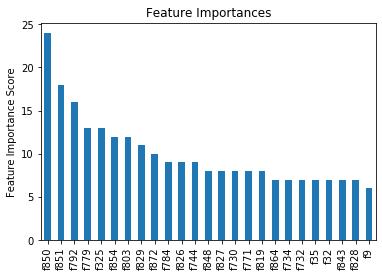

In [337]:
for i in np.arange(2):
    X_all = getSample(0.80)
    y_all = X_all['Response']
    X_all = X_all.iloc[:,:-1].values

    xgb1 = XGBClassifier(learning_rate=0.05,
                     base_score=0.0056,
                     n_estimators=50,
                     max_depth=7,
                     min_child_weight=1,
                     gamma=0.1,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective='binary:logistic',
                     nthread=4,
                     scale_pos_weight=3,
                     seed=1)
    modelfit(xgb1, X_all, y_all, i)
    

In [335]:
# Replce NAN with "MeanValue"
#X_all=X_all.fillna(X_all.mean())

In [ ]:
#Check number of noraml and anomaly in the test data after sampling

unique, counts = np.unique(y_all, return_counts=True)
dict(zip(unique, counts))

In [ ]:
#Return true if there is null values
print(np.any(np.isnan(X_all)))

In [ ]:
X_all.head()